# WeatherPy

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Contains python code for data pull
import weatherpy

In [3]:
city_list = weatherpy.generate_city_list()

city_list does not contain enough data. Running again


In [4]:
weather_data = weatherpy.get_weather_data(city_list)

Data Retrieval Start
_________________________
Processing Record 1 | punta arenas
Processing Record 2 | lokachi
Processing Record 3 | hermanus
Processing Record 4 | dryden
Processing Record 5 | arraial do cabo
Processing Record 6 | saint-philippe
Processing Record 7 | bethel
Processing Record 8 | saint-joseph
Processing Record 9 | itaqui
Processing Record 10 | ushuaia
Processing Record 11 | avarua
City not found. Skipping...
Processing Record 12 | ginir
Processing Record 13 | sibenik
Processing Record 14 | poshekhonye
Processing Record 15 | puerto ayora
Processing Record 16 | acapulco
Processing Record 17 | barrow
Processing Record 18 | saint-augustin
Processing Record 19 | mar del plata
Processing Record 20 | mataura
Processing Record 21 | hithadhoo
Processing Record 22 | vila velha
Processing Record 23 | port arthur
Processing Record 24 | mwinilunga
Processing Record 25 | pisco
Processing Record 26 | rikitea
Processing Record 27 | nanortalik
Processing Record 28 | vaini
Processing Re

In [5]:
# TODO: Delete before submitting
weather_data = pd.read_csv('../output_data/cities.csv')

In [6]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

# export dataframe to csv
weather_df.to_csv(weatherpy.output_data_file)

In [7]:
weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,iqaluit,63.7506,-68.5145,24.80,80,90,19.57,CA,1618957759
1,1,atuona,-9.8000,-139.0333,80.64,70,2,17.76,PF,1618957759
2,2,ushuaia,-54.8000,-68.3000,44.60,57,20,8.05,AR,1618957597
3,3,punta arenas,-53.1500,-70.9167,44.60,61,0,11.50,CL,1618957759
4,4,sitka,57.0531,-135.3300,48.20,71,40,9.22,US,1618957760


## Data Analysis

### Temperature (F) vs. Latitude

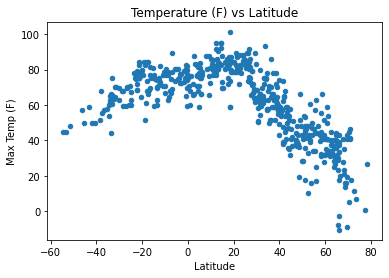

In [8]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude')
plt.show()

### Humidity (%) vs Latitude

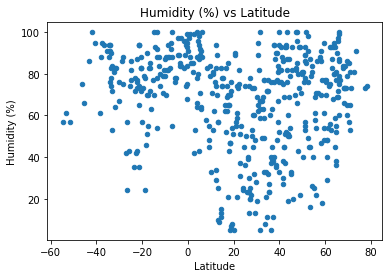

In [9]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude')
plt.show()

### Cloudiness (%) vs Latitude

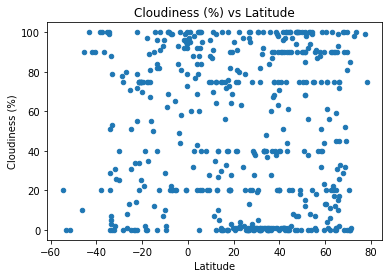

In [10]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude')
plt.show()

### Wind Speed (mph) vs Latitude

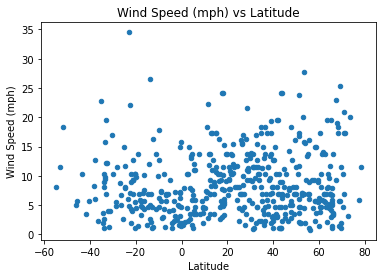

In [11]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude')
plt.show()

In [12]:
nh_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
sh_weather_df = weather_df.loc[weather_df['Lat'] < 0]

## Data Analysis by Hemisphere

## Temperature

r-value: -0.8423348620486578
r-squared value: 0.7095280198225314


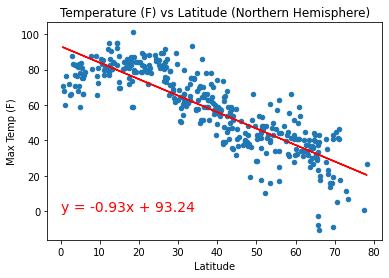

In [20]:
# Northern Hemisphere

lat = nh_weather_df['Lat']
temp = nh_weather_df['Max Temp']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

nh_weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude (Northern Hemisphere)')
plt.plot(lat, regress_values, 'r-')
plt.annotate(line_eq, (0, 0), fontsize=14, color='red')
plt.show()

r-value: 0.6536443401872845
r-squared value: 0.42725092345887045


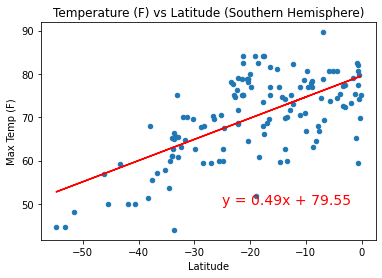

In [24]:
# Southern Hempisphere

lat = sh_weather_df['Lat']
temp = sh_weather_df['Max Temp']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

sh_weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude (Southern Hemisphere)')
plt.plot(lat, regress_values, 'r-')
plt.annotate(line_eq, (-25, 50), fontsize=14, color='red')
plt.show()

### Humidity

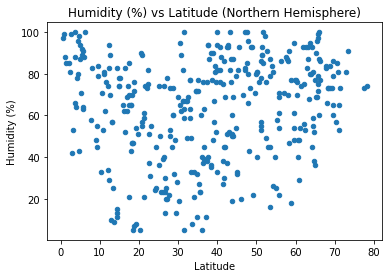

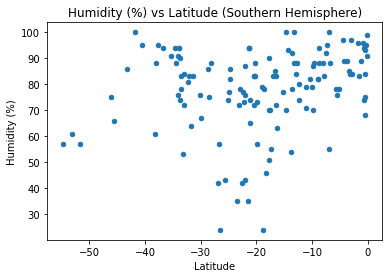

In [15]:
nh_weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude (Northern Hemisphere)')
plt.show()

sh_weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude (Southern Hemisphere)')
plt.show()

### Cloudiness

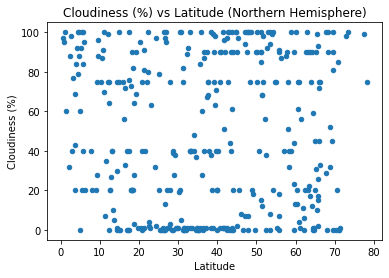

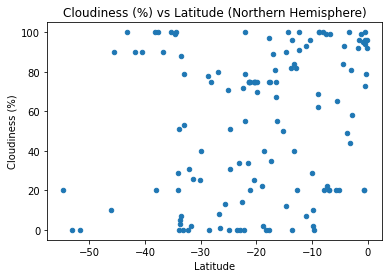

In [16]:
nh_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude (Northern Hemisphere)')
plt.show()

sh_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude (Northern Hemisphere)')
plt.show()

### Wind Speed (mph) vs Latitude

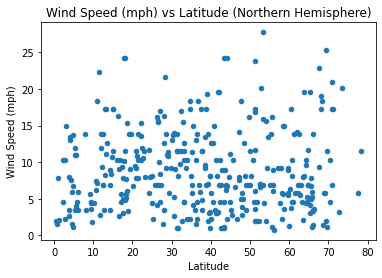

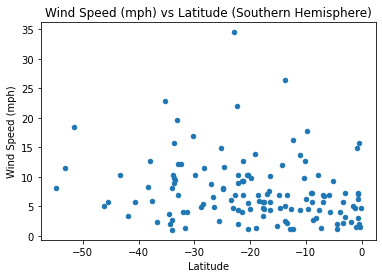

In [17]:
nh_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude (Northern Hemisphere)')
plt.show()

sh_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude (Southern Hemisphere)')
plt.show()
